<a href="https://colab.research.google.com/github/nishantruwari/projects/blob/main/Skin_Cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow scikit-learn pandas matplotlib


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

100%|██████████| 5.20G/5.20G [00:46<00:00, 120MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2


In [ ]:
import os

# List the contents of the downloaded directory
print(os.listdir(path))

['HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'ham10000_images_part_2', 'hmnist_8_8_L.csv', 'hmnist_8_8_RGB.csv', 'HAM10000_images_part_2', 'HAM10000_images_part_1', 'hmnist_28_28_RGB.csv', 'ham10000_images_part_1']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

train_data = datagen.flow_from_directory(
    path,  # Use the dataset path here
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    path,  # Use the dataset path here
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16024 images belonging to 4 classes.
Found 4006 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

model1 = models.Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,284 (91.98 MB)

 Trainable params: 24,060,164 (91.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.applications import VGG16

model2 = models.Sequential([
    VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 14,847,044 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train ResNet50
history1 = model1.fit(train_data, validation_data=val_data, epochs=10)

# Train VGG16
history2 = model2.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


501/501 ━━━━━━━━━━━━━━━━━━━━ 279s 436ms/step - accuracy: 0.3054 - loss: 1.4437 - val_accuracy: 0.2499 - val_loss: 1.3999
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 196s 360ms/step - accuracy: 0.3435 - loss: 1.2989 - val_accuracy: 0.2506 - val_loss: 1.3965
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 188s 334ms/step - accuracy: 0.3405 - loss: 1.2770 - val_accuracy: 0.2501 - val_loss: 1.4409
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 173s 342ms/step - accuracy: 0.3386 - loss: 1.2659 - val_accuracy: 0.2484 - val_loss: 1.4273
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 163s 321ms/step - accuracy: 0.3416 - loss: 1.2668 - val_accuracy: 0.2464 - val_loss: 1.4387
Epoch 6/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 200s 316ms/step - accuracy: 0.3509 - loss: 1.2540 - val_accuracy: 0.2486 - val_loss: 1.4228
Epoch 7/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 191s 296ms/step - accuracy: 0.3583 - loss: 1.2430 - val_accuracy: 0.2431 - val_loss: 1.6037
Epoch 8/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 203s 300ms/step - accuracy: 0.3439 - loss: 1.24

# 6. Ensemble the Models

Use the average of predictions or a weighted ensemble.

In [ ]:
import numpy as np

# Get predictions from both models
pred1 = model1.predict(val_data)
pred2 = model2.predict(val_data)

# Average predictions
ensemble_pred = (pred1 + pred2) / 2

# Convert to class labels
ensemble_labels = np.argmax(ensemble_pred, axis=1)
true_labels = val_data.classes


126/126 ━━━━━━━━━━━━━━━━━━━━ 31s 217ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step


Evaluate Ensemble Performance:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(true_labels, ensemble_labels)
print(f"Ensemble Accuracy: {accuracy}")

print(classification_report(true_labels, ensemble_labels))


Ensemble Accuracy: 0.24063904143784323
              precision    recall  f1-score   support

           0       0.23      0.21      0.22      1000
           1       0.00      0.00      0.00      1003
           2       0.24      0.75      0.37      1000
           3       0.20      0.01      0.02      1003

    accuracy                           0.24      4006
   macro avg       0.17      0.24      0.15      4006
weighted avg       0.17      0.24      0.15      4006



7. Save and Load Models

In [ ]:
model1.save('model_resnet50.h5')
model2.save('model_vgg16.h5')


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model_resnet50.h5')
model2 = load_model('model_vgg16.h5')


8. Visualize Results

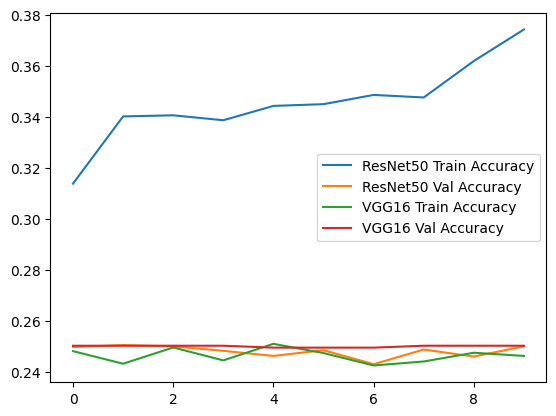

In [ ]:
import matplotlib.pyplot as plt

# Plot ResNet50
plt.plot(history1.history['accuracy'], label='ResNet50 Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='ResNet50 Val Accuracy')

# Plot VGG16
plt.plot(history2.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='VGG16 Val Accuracy')

plt.legend()
plt.show()
